# **Mission of the bioinformatic tools notebook**

You have just trained, tested, and validated classification and regression models to predict the response of retina phenotypes to the gene expression based on RNA-seq .  Some of your models are promising to predict the phenotype based on their performance.  Now we wish to validate your findings by comparing your results with those obtained from traditional statistical bioinformatic tools.  We also wish to intepret your findings by determining the biological significance of those genes that your models identified.

Your approach is to use various traditional statistical tools that bioinformaticians use when they analyze the same sort of data (gene expression accompanied by a phenotype).  These tools include [DESeq2](https://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html), [gene set enrichment analysis](https://en.wikipedia.org/wiki/Gene_set_enrichment_analysis), and [pathway enrichment analysis](https://en.wikipedia.org/wiki/Pathway_analysis).

# Read in the notebook methods

In [ ]:
# install and import the python module for importing a notebook
!pip install import_ipynb
import import_ipynb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00


In [ ]:
# mount your google drive to this notebook
from google.colab import drive
drive.flush_and_unmount()
drive.mount("mnt", force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at mnt


In [ ]:
# import the "Copy of methods.ipynb" from your google drive into this notebook
m = __import__("mnt/MyDrive/Colab Notebooks/Copy of methods")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 184.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 156.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.4/255.4 kB 220.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 175.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 177.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 145.4 MB/s eta 0:00:00
  Created wheel for pybiomart: filename=pybiomart-0.1-py3-none-any.whl size=14600 sha256=1f01611e50f1e0cecfd59701b54c61ad3d2a7d09ee521bb65a4ac400006080a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-ik3_dhi_/wheels/ad/45/48/b79ec13dfdbc577

# Read in and prepare the data

## Read in the data from OSD

In [ ]:
# define dictionaries for data and metadata
data=dict()
metadata=dict()

In [ ]:
# use m.read_rnaseq_data() to read in the normalized transcriptomic counts from OSD-255
data['255-unnormalized'] = m.read_rnaseq_data('255_rna_seq_RSEM_Unnormalized_Counts')
print('RNA-seq data shape: ', data['255-unnormalized'].shape)
data['255-unnormalized'].head()

RNA-seq data shape:  (56840, 17)


,Unnamed: 0,GSM3932693,GSM3932694,GSM3932695,GSM3932696,GSM3932697,GSM3932698,GSM3932699,GSM3932700,GSM3932701,GSM3932702,GSM3932703,GSM3932704,GSM3932705,GSM3932706,GSM3932707,GSM3932708
0,ENSMUSG00000000001,226.0,288.0,316.0,252.0,176.0,244.0,291.0,247.0,242.0,256.0,249.0,241.0,188.0,273.0,242.0,288.0
1,ENSMUSG00000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSMUSG00000000028,24.0,38.0,34.0,29.0,10.0,22.0,29.0,35.0,32.0,42.0,30.0,22.0,19.0,25.0,24.0,44.0
3,ENSMUSG00000000031,9.0,2.0,3.0,27.0,0.0,3.0,7.0,8.0,2.0,7.0,1.0,2.0,3.0,4.0,2.0,1.0
4,ENSMUSG00000000037,10.0,23.0,25.0,29.0,11.0,19.0,12.0,25.0,21.0,15.0,10.0,18.0,6.0,27.0,30.0,21.0


In [ ]:
# read in metadata for 255
metadata['255'] = m.read_meta_data('255')
metadata['255'].head()

,Source Name,Sample Name,Characteristics[Organism],Term Source REF,Term Accession Number,Characteristics[Strain],Term Source REF.1,Term Accession Number.1,Characteristics[Animal Source],Characteristics[Sex],...,Parameter Value[absorbed radiation dose rate],Unit.6,Term Source REF.15,Term Accession Number.15,Parameter Value[ionizing radiation],Term Source REF.16,Term Accession Number.16,Parameter Value[ionizing radiation categorized by source],Term Source REF.17,Term Accession Number.17
0,GC9,GSM3932693,Mus musculus,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,C57BL/6J,EFO,http://www.ebi.ac.uk/efo/EFO_0000606,Jackson Laboratory,Male,...,NaN,Not Applicable,OSD,https://osdr.nasa.gov/,non-irradiated,RBO,http://purl.obolibrary.org/obo/RBO_00005025,Not Applicable,NCIT,http://purl.obolibrary.org/obo/NCIT_C48660
1,GC11,GSM3932694,Mus musculus,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,C57BL/6J,EFO,http://www.ebi.ac.uk/efo/EFO_0000606,Jackson Laboratory,Male,...,NaN,Not Applicable,OSD,https://osdr.nasa.gov/,non-irradiated,RBO,http://purl.obolibrary.org/obo/RBO_00005025,Not Applicable,NCIT,http://purl.obolibrary.org/obo/NCIT_C48660
2,GC15,GSM3932695,Mus musculus,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,C57BL/6J,EFO,http://www.ebi.ac.uk/efo/EFO_0000606,Jackson Laboratory,Male,...,NaN,Not Applicable,OSD,https://osdr.nasa.gov/,non-irradiated,RBO,http://purl.obolibrary.org/obo/RBO_00005025,Not Applicable,NCIT,http://purl.obolibrary.org/obo/NCIT_C48660
3,GC16,GSM3932696,Mus musculus,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,C57BL/6J,EFO,http://www.ebi.ac.uk/efo/EFO_0000606,Jackson Laboratory,Male,...,NaN,Not Applicable,OSD,https://osdr.nasa.gov/,non-irradiated,RBO,http://purl.obolibrary.org/obo/RBO_00005025,Not Applicable,NCIT,http://purl.obolibrary.org/obo/NCIT_C48660
4,GC17,GSM3932697,Mus musculus,NCBITAXON,http://purl.bioontology.org/ontology/NCBITAXON...,C57BL/6J,EFO,http://www.ebi.ac.uk/efo/EFO_0000606,Jackson Laboratory,Male,...,NaN,Not Applicable,OSD,https://osdr.nasa.gov/,non-irradiated,RBO,http://purl.obolibrary.org/obo/RBO_00005025,Not Applicable,NCIT,http://purl.obolibrary.org/obo/NCIT_C48660


## Filter data

In [ ]:
# filter out non-protein coding genes and genes with NaN values
print('shape before filtering: ', data['255-unnormalized'].shape)
rna_seq = m.filter_data(data['255-unnormalized'], dropnans=True, dropgenes='non-coding', droplowcvs=0, droplowcount=10)
print('shape after filtering: ', rna_seq.shape)
rna_seq.head()

shape before filtering:  (56840, 17)
21680
shape after filtering:  (15968, 17)


,Unnamed: 0,GSM3932693,GSM3932694,GSM3932695,GSM3932696,GSM3932697,GSM3932698,GSM3932699,GSM3932700,GSM3932701,GSM3932702,GSM3932703,GSM3932704,GSM3932705,GSM3932706,GSM3932707,GSM3932708
0,ENSMUSG00000000001,226.0,288.0,316.0,252.0,176.0,244.0,291.0,247.0,242.0,256.0,249.0,241.0,188.0,273.0,242.0,288.0
2,ENSMUSG00000000028,24.0,38.0,34.0,29.0,10.0,22.0,29.0,35.0,32.0,42.0,30.0,22.0,19.0,25.0,24.0,44.0
4,ENSMUSG00000000037,10.0,23.0,25.0,29.0,11.0,19.0,12.0,25.0,21.0,15.0,10.0,18.0,6.0,27.0,30.0,21.0
5,ENSMUSG00000000049,2.0,3.0,1.0,6.0,1.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0
6,ENSMUSG00000000056,459.0,623.0,724.0,605.0,509.0,637.0,672.0,581.0,593.0,604.0,529.0,593.0,520.0,679.0,611.0,767.0


## transpose dataframe

In [ ]:
print('shape before transpose: ', rna_seq.shape)
rna_seq = m.transpose_df(rna_seq, cur_index_col='Unnamed: 0', new_index_col = 'sample')
print('shape after transpose: ', rna_seq.shape)

shape before transpose:  (15968, 17)
shape after transpose:  (16, 15969)


In [ ]:
rna_seq.head()

,sample,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,...,ENSMUSG00000118664,ENSMUSG00000118665,ENSMUSG00000118667,ENSMUSG00000118668,ENSMUSG00000118669,ENSMUSG00000118671,ENSMUSG00000118672,ENSMUSG00000120166,ENSMUSG00000120992,ENSMUSG00002076083
0,GSM3932693,226.0,24.0,10.0,2.0,459.0,236.0,223.0,569.0,667.0,...,704.0,250.0,595.0,89.10,275.0,13.0,2.0,140.82,2.0,149.04
1,GSM3932694,288.0,38.0,23.0,3.0,623.0,252.0,321.0,642.0,945.0,...,731.0,247.0,677.0,98.36,728.0,22.0,176.0,176.17,6.0,166.25
2,GSM3932695,316.0,34.0,25.0,1.0,724.0,359.0,324.0,755.0,1134.0,...,985.0,278.0,494.0,171.19,515.0,24.0,3.0,187.55,3.0,260.86
3,GSM3932696,252.0,29.0,29.0,6.0,605.0,299.0,313.0,594.0,974.0,...,830.0,244.0,603.0,112.82,332.0,39.0,850.0,160.88,11.0,205.46
4,GSM3932697,176.0,10.0,11.0,1.0,509.0,209.0,272.0,513.0,758.0,...,535.0,222.0,431.0,111.10,278.0,14.0,17.0,128.97,5.0,135.33


# Perform differential gene expression analysis

We are using the [PyDESeq2](https://pydeseq2.readthedocs.io/en/latest/index.html) implementation of DESeq2 to perform differential gene expression analysis to see if there's a significant difference in gene expression between the ground control and spaceflight samples.  The tool requires our data to be in a particular format, so after we read in the data from OSDR, we'll perform some steps to transform the data accordingly.

In [ ]:
# First let's create a conditions table for 'Factor Value: Spaceflight'. We'll assign 0 for ground control and 1 for spaceflight
condition_dict=dict()
for sample in list(rna_seq['sample']):
    val=metadata['255'][metadata['255']['Sample Name']==sample]['Factor Value[Spaceflight]'].values[0]
    if val == 'Ground Control':
        condition_dict[sample] = 0
    else:
        condition_dict[sample] = 1
rna_seq["condition"] = rna_seq["sample"].map(condition_dict)
conditions=rna_seq[['sample', 'condition']]
conditions

,sample,condition
0,GSM3932693,0
1,GSM3932694,0
2,GSM3932695,0
3,GSM3932696,0
4,GSM3932697,0
5,GSM3932698,0
6,GSM3932699,0
7,GSM3932700,0
8,GSM3932701,1
9,GSM3932702,1


In [ ]:
# remove sample and condition from rna_seq dataframe
counts=rna_seq.drop(columns=['sample', 'condition']).reset_index(drop=True)
# check for non-numeric
counts.applymap(m.np.isreal)
# convert all cells to integers
counts=counts.astype(int)
counts.head()

,ENSMUSG00000000001,ENSMUSG00000000028,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,ENSMUSG00000000093,...,ENSMUSG00000118664,ENSMUSG00000118665,ENSMUSG00000118667,ENSMUSG00000118668,ENSMUSG00000118669,ENSMUSG00000118671,ENSMUSG00000118672,ENSMUSG00000120166,ENSMUSG00000120992,ENSMUSG00002076083
0,226,24,10,2,459,236,223,569,667,614,...,704,250,595,89,275,13,2,140,2,149
1,288,38,23,3,623,252,321,642,945,722,...,731,247,677,98,728,22,176,176,6,166
2,316,34,25,1,724,359,324,755,1134,880,...,985,278,494,171,515,24,3,187,3,260
3,252,29,29,6,605,299,313,594,974,682,...,830,244,603,112,332,39,850,160,11,205
4,176,10,11,1,509,209,272,513,758,582,...,535,222,431,111,278,14,17,128,5,135


In [ ]:
# run the DESEq2 experiment contrasting conditin "0" (ground control) to condition "1" (spaceflight)
dds=m.DeseqDataSet(counts=counts, metadata=conditions, design_factors="condition")
dds.deseq2()
stats_results = m.DeseqStats(dds, contrast = ('condition', 0, 1))
stats_results.summary()
res = stats_results.results_df

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 19.81 seconds.

Fitting dispersion trend curve...
... done in 0.56 seconds.

Fitting MAP dispersions...
... done in 22.58 seconds.

Fitting LFCs...
... done in 11.72 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 276 outlier genes.

Fitting dispersions...
... done in 0.31 seconds.

Fitting MAP dispersions...
... done in 0.34 seconds.

Fitting LFCs...
... done in 0.26 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: condition 0 vs 1
                      baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSMUSG00000000001  248.573402       -0.024522  0.068869 -0.356075  0.721784   
ENSMUSG00000000028   28.136468       -0.176222  0.216165 -0.815220  0.414946   
ENSMUSG00000000037   18.361084        0.006622  0.282732  0.023421  0.981314   
ENSMUSG00000000049    1.701645        1.833690  0.906264  2.023351  0.043037   
ENSMUSG00000000056  601.588070       -0.091791  0.052483 -1.748971  0.080296   
...                        ...             ...       ...       ...       ...   
ENSMUSG00000118671   16.244991        0.272215  0.334533  0.813715  0.415808   
ENSMUSG00000118672   39.651145        1.476116  0.716690  2.059630  0.039434   
ENSMUSG00000120166  153.732208        0.004356  0.096640  0.045078  0.964045   
ENSMUSG00000120992    5.386701        0.200787  0.457590  0.438792  0.660812   
ENSMUSG00002076083  180.369376       -0.028834  0.096360 -0.29922

... done in 3.79 seconds.



In [ ]:
# extract results of the DESeq2 experiment where  padj < 0.05, and log2fc > 0
#res = res[res.baseMean >= 10000]
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0)]
gene_list=m.convert_ids_to_names(list(sigs.index))
gene_list

INFO:biothings.client:querying 1-483 ...
INFO:biothings.client:Finished.


['Mnt',
 'Cdh4',
 'Ckmt1',
 'Hk2',
 'Scn4a',
 'Nhp2',
 'Vps9d1',
 'Pcbp3',
 'Npepps',
 'Ifrd1',
 'Folh1',
 'Chordc1',
 'Nup214',
 'Rhoc',
 'Ipo4',
 'Hltf',
 'Rgs20',
 'Ap2a2',
 'Ranbp2',
 'Grik5',
 'Pex19',
 'Dusp3',
 'Mast2',
 'Fam162a',
 'Clcn3',
 'Pcp2',
 'Aqp1',
 'Hdac9',
 'Jkamp',
 'Plekha8',
 'Eif4g2',
 'Cabp5',
 'Cdcp3',
 'Bbs1',
 'Abhd16a',
 'Dio2',
 'Ubc',
 'Hdac5',
 'Slc1a7',
 'Cacna2d2',
 'Slc3a2',
 'Prox1',
 'Odc1',
 'Ptprs',
 'Zbtb47',
 'Med16',
 'Klhl3',
 'Stc1',
 'Ppp1cb',
 'Hmgb3',
 'Hspa8',
 'Lrrc27',
 'Vtn',
 'Zfp207',
 'Wsb1',
 'Pigt',
 'Ddx27',
 'Med13l',
 'H2bc4',
 'Kdm6b',
 'Phf23',
 'Tnfsfm13',
 'Trip10',
 'Ubb',
 'Slc6a8',
 'Arfgef3',
 'P4ha1',
 'Arid5b',
 'Ahi1',
 'Cdk17',
 'Cep83',
 'Hsp90b1',
 'Ccar1',
 'Ddx21',
 'Hkdc1',
 'Hnrnpab',
 'Rack1',
 'Adcy1',
 'Ccdc117',
 'Xbp1',
 'Prr11',
 'Dnmt3a',
 'Ftsj3',
 'Slc25a19',
 'Doc2b',
 'Prpf8',
 'Gucy2e',
 'Per1',
 'Tmem107',
 'Pik3r5',
 'Rcvrn',
 'Nin',
 'Trim9',
 'Hif1a',
 'Pals1',
 'Lgmn',
 'Pfkp',
 'Dpf3',
 'Hsp9

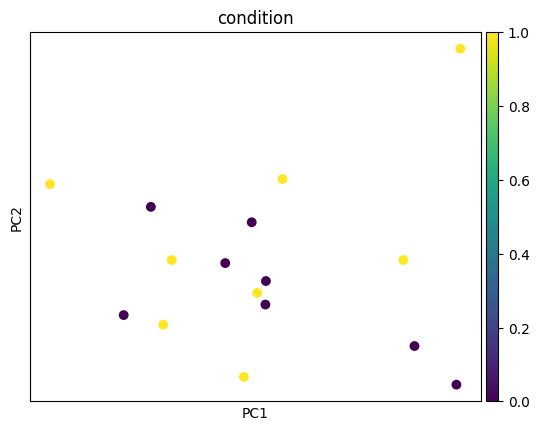

In [ ]:
# let's plot PCA
m.sc.tl.pca(dds)
m.sc.pl.pca(dds, color='condition', size=200)

# Perform gene set and pathway enrichment analysis

In [ ]:
# first use the DESeq2 results to rank the genes based on the statistic 'stat' and convert genes to upper case
ranking = res[['stat']].dropna().sort_values('stat', ascending=False)
ranking_index=list(ranking.index)
ranking_index_upper=[x.upper() for x in ranking_index]
ranking.index=m.convert_ids_to_names(ranking_index_upper)
ranking

INFO:biothings.client:querying 1-1000 ...
INFO:biothings.client:querying 1001-2000 ...
INFO:biothings.client:querying 2001-3000 ...
INFO:biothings.client:querying 3001-4000 ...
INFO:biothings.client:querying 4001-5000 ...
INFO:biothings.client:querying 5001-6000 ...
INFO:biothings.client:querying 6001-7000 ...
INFO:biothings.client:querying 7001-8000 ...
INFO:biothings.client:querying 8001-9000 ...
INFO:biothings.client:querying 9001-10000 ...
INFO:biothings.client:querying 10001-11000 ...
INFO:biothings.client:querying 11001-12000 ...
INFO:biothings.client:querying 12001-13000 ...
INFO:biothings.client:querying 13001-14000 ...
INFO:biothings.client:querying 14001-15000 ...
INFO:biothings.client:querying 15001-15968 ...
INFO:biothings.client:Finished.
INFO:biothings.client:Pass "returnall=True" to return complete lists of duplicate or missing query terms.


,stat
Sag,12.240081
Pdzph1,11.515498
Glmn,10.851853
Cpt1a,10.827171
Dyrk2,8.505286
...,...
H2bc4,-8.924173
Ide,-9.865235
Hsp90aa1,-11.681474
Irf7,-14.629521


In [ ]:
# look at the names of the libraries that are available to use for PEA and GSEA
m.gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'COMPARTMENTS_Curated_2025',
 'COMPARTMENTS_Experimental_2025',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Scre

In [ ]:
# enable wide-view dataframes (otherwise text gets cut off for the Term column)
m.data_table.enable_dataframe_formatter()

In [ ]:
# use enrichR to get gene ontology terms for molecular function, cellular components, and biological processes (GSEA)
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['GO_Molecular_Function_2023','GO_Cellular_Component_2023', 'GO_Biological_Process_2023'],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)


,Term,Genes,Adjusted P-value
0,RNA Binding (GO:0003723),TCERG1;RPL30;DDX46;EIF4A3;HMGB3;NOC2L;WDR46;CC...,0.000001
1,ATP Binding (GO:0005524),SRPK2;HSPA8;HSP90AA1;CDKL5;DYRK2;HSPA5;MAST2;E...,0.010327
2,Adenyl Ribonucleotide Binding (GO:0032559),SRPK2;HSPA8;HSP90AA1;CDKL5;DYRK2;HSPA5;MAST2;E...,0.010327
3,Ubiquitin Protein Ligase Binding (GO:0031625),HSPA8;KDM4A;PACRG;HSP90AA1;SLF2;HSPA5;GLMN;DIO...,0.038494
4,Carboxylic Acid Transmembrane Transporter Acti...,SLC7A5;SLC38A1;SLC6A8;SLC16A6;SLC6A11;SLC16A3;...,0.047908
453,Intracellular Membrane-Bounded Organelle (GO:0...,TCERG1;RPL30;PRDM9;EIF4A3;TESK1;RORB;NOC2L;FAB...,0.000670
454,Nucleus (GO:0005634),TCERG1;RPL30;PRDM9;EIF4A3;TESK1;RORB;NOC2L;FAB...,0.001776
455,Neuron Projection (GO:0043005),PTPRS;CAMK2A;LRP4;ATP1A3;FXR1;RBM3;TRIM9;UBB;R...,0.007801
456,Dendrite (GO:0030425),HSPA8;PRNP;CDKL5;BNIP3;SLC4A10;LRP4;FXR1;RBM3;...,0.019621
694,Carboxylic Acid Transport (GO:0046942),SLC7A5;SLC38A1;SLC16A6;SLC6A11;SLC3A2;SLC16A3;...,0.045143


In [ ]:
# use enrichR to get enriched pathways from KEGG (PEA)
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['KEGG_2019_Mouse' ],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value
0,Spliceosome,TCERG1;HSPA8;AQR;HNRNPA3;SF3B3;DDX46;PCBP1;EIF...,0.018482
1,Phototransduction,GUCY2E;RCVRN;GUCA1B;SAG;GUCA1A,0.044359


In [ ]:
# use enrichR to get enriched pathways from WikiPathways_2019_Mouse (PEA)
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['WikiPathways_2019_Mouse' ],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value


In [ ]:
#  use enrichR to get enriched pathways from  ARCHS4_Tissues
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['ARCHS4_Tissues' ],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value
0,RETINA,FHOD3;FRMPD1;PROS1;FRMPD2;PLEKHB1;WWC2;TESK1;G...,4.717814e-08
1,CEREBRAL CORTEX,FHOD3;HSPB6;GRIK5;FRMPD2;PLEKHB1;RORB;CXCL14;R...,1.669205e-04
2,BRAIN (BULK),FHOD3;HSPB6;GRIK5;FRMPD2;PLEKHB1;RORB;DOC2B;RL...,1.110163e-03
3,CINGULATE GYRUS,FHOD3;PTPRS;GRIK5;PLEKHB1;RORB;PRPF19;CXCL14;R...,1.110163e-03
4,PREFRONTAL CORTEX,FHOD3;TCERG1;RORB;VLDLR;LRRC2;RLBP1;PCMTD2;PPP...,1.110163e-03
5,SPINAL CORD,FHOD3;PTPRS;GRIK5;MAST2;FRMPD2;PLEKHB1;DOC2B;R...,5.119414e-03
6,SPINAL CORD (BULK),FHOD3;PTPRS;GRIK5;MAST2;FRMPD2;PLEKHB1;DOC2B;R...,5.119414e-03
7,SUPERIOR FRONTAL GYRUS,FHOD3;HSPB6;GRIK5;FRMPD2;PLEKHB1;TESK1;GUCA1A;...,5.119414e-03
8,FETAL BRAIN,FHOD3;PTPRS;GRIK5;PLEKHB1;LPCAT1;GUCA1B;GUCA1A...,3.611316e-02
9,NEURONAL EPITHELIUM,FHOD3;TCERG1;SUV39H2;HJURP;HMGB3;UFSP2;RORB;VL...,3.611316e-02


In [ ]:
# use enrichR to get enriched pathways Rare_Diseases_AutoRIF_Gene_Lists
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['Rare_Diseases_AutoRIF_Gene_Lists' ],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value
0,Retinitis pigmentosa,RPGRIP1;BBS1;MKKS;RP1;RCVRN;PRCD;GUCA1A;NPHP4;...,0.040635
1,Pigmentary retinopathy,RPGRIP1;BBS1;MKKS;RP1;RCVRN;PRCD;GUCA1A;NPHP4;...,0.040635


In [ ]:
# use enrichR to get enriched pathways  WikiPathways_2019_Mouse
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['Elsevier_Pathway_Collection' ],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(10)

,Term,Genes,Adjusted P-value
0,Genes with Mutations Associated with Retinitis...,RPGRIP1;RP1;RBP3;PRCD;PCARE;GUCA1B;SAG;GUCA1A;...,0.000542
1,Proteins Involved in Retinitis Pigmentosa,SORT1;PRCD;PCARE;GUCA1B;GUCA1A;PRPF8;RLBP1;RPG...,0.000688
2,Protein Folding,HSPA8;HSP90AA1;ST13;HSP90B1,0.037970


In [ ]:
# use enrichR to get enriched pathways  RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO
enr = m.gp.enrichr(gene_list=gene_list,
                 gene_sets=['RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO' ],
                 organism='mouse',
                 outdir=None,
                )

# show top 10 results with adjusted p-value less than 0.05
enr.results[enr.results['Adjusted P-value'] < 0.05][['Term', 'Genes', 'Adjusted P-value']].head(20)

,Term,Genes,Adjusted P-value
0,CrX Retina Knockout GSE61389 down,SUV39H2;ANKRD33B;KLHL36;HSPB6;FRMPD1;GUCA1B;ZD...,7.825808e-37
1,Mef2d Retina Knockout GSE61389 down,ANKRD33B;PTPRS;MT-CO1;ZFP207;PLEKHB1;ZDHHC5;RO...,3.780989e-35
2,Dgcr8 Cone photoreceptors - Post natal day 30 ...,ANKRD33B;MT-CO1;ZFP207;PLEKHB1;ZDHHC5;GUCA1A;R...,1.561495e-34
3,Dgcr8 Cone photoreceptors - Post natal day 60 ...,ANKRD33B;MT-CO1;ZFP207;PLEKHB1;ZDHHC5;GUCA1A;V...,1.561495e-34
4,Dgcr8 Cone photoreceptors - Post natal day 40 ...,ANKRD33B;MT-CO1;ZFP207;PLEKHB1;ZDHHC5;GUCA1A;R...,8.068200e-33
5,ABCA4 Retina knockout GSE63772 down,SUV39H2;ANKRD33B;ZFP329;ZFP207;HJURP;BC034090;...,2.241989e-29
6,DGCR8 Cone photoreceptors Knockout GSE58498 up,ANKRD33B;MT-CO1;PLEKHB1;ZDHHC5;RORB;VLDLR;ACTB...,6.122499e-27
7,DMOG Retina GSE74170 up,ANKRD33B;PTPRS;PLEKHB1;LPCAT1;RORB;VLDLR;RLBP1...,2.905560e-26
8,GFP Retina Expression GSE56473 up,ANKRD33B;FRMPD1;LPCAT1;GUCA1B;GUCA1A;DOC2B;VLD...,2.450009e-25
9,Dgcr8 Cone photoreceptors - Post natal day 90 ...,ANKRD33B;MT-CO1;ZFP207;PLEKHB1;RORB;VLDLR;ACTB...,1.446128e-24
